# PyTorch Dataset

* [Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

> Dataset stores the samples and labels. DataLoader provides iterable interfaces to the Dataset to enable easy access to the samples.


## Dataset

### Map Dataset

Implements the ```__getitem__()``` and ```__len__()``` protocols to access a Dataset record via (possibly non-integral) indices/keys to data samples.

### Iterable Dataset

A subclass of [IterableDataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset) that implements the __iter__() protocol to sequentially (not random access) stream samples. ```iter(dataset)``` may return a stream of data reading from a database, a remote server, or even logs generated in real time.

### Classes

* [CLASS torch.utils.data.Dataset(*args, **kwds)](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)

> An abstract class representing a Dataset.

There are multiple concreate Dataset implementations.

* IterableDataset
* [TensorDataset ](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#TensorDataset)
* StackDataset
* ConcatDataset
* ChainDataset


## Predefined Datasets

 PyTorch provides pre-defined datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset.
 
> * [Image Datasets](https://pytorch.org/vision/stable/datasets.html)
> * [Text Datasets](https://pytorch.org/text/stable/datasets.html)
> * [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

## Dataset Parameters

* [Loading a Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#loading-a-dataset)

> * ```root``` is the local drive path where the train/test data is stored.
> * ```train``` specifies training or test dataset,
> * ```download=True``` downloads the data from the internet if it’s not available at root.
> * ```transform``` and ```target_transform``` specify the feature and label transformations
> ```
> training_data = datasets.FashionMNIST(
>     root="data",
>     train=True,
>     download=True,
>     transform=ToTensor()
> )
> ```

In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


## Fashion MNIST Dataset

```Dataset[index]``` gives ```(image, label)``` tuple.

In [3]:
id_to_label = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [4]:
training_data: Dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data: Dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26421880/26421880 [03:36<00:00, 122194.40it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 57829.38it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:37<00:00, 117954.82it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 88917.12it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Split Train dataset into Train and Validation

* [torch.utils.data.random_split(dataset, lengths, generator=<torch._C.Generator object>)](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split)

In [5]:
train_size = int(0.8 * len(training_data))
validation_size = len(training_data) - train_size
training_data, validation_data = torch.utils.data.random_split(training_data, [train_size, validation_size])

NameError: name 'full_dataset' is not defined

In [10]:
# plt.imshow(training_data[0])
data, label = training_data[0]
id_to_label[label]

'Ankle Boot'

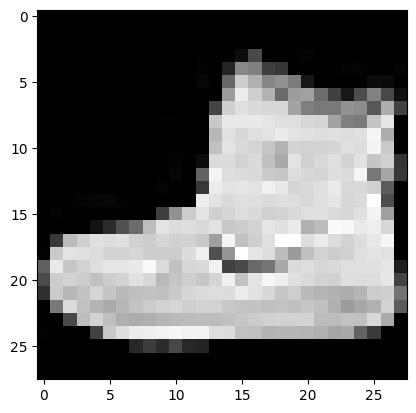

In [13]:
plt.imshow(data.squeeze(), cmap="gray")

---
# DataLoader 

* [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

DataLoader is an iterable interface to provide samples as a minibatch, reshuffle the samples at every epoch, and use Python’s multiprocessing to speed up data retrieval from a Dataset for the model training.


## Sampler

* [torch.utils.data.Sampler](https://pytorch.org/docs/stable/data.html#torch.utils.data.Sampler)

DataLoader uses a Sampler utility class to permutate the order of records in the dataset, such as shuffle the records in a Dataset. Dataloader instantiates:

* a sequential or shuffled sampler based on the ```shuffle``` argument. Or you can provide a custom sampler to ```sampler``` argument. 
* a batch_sampler based on the ```batch_size``` and ```drop_last``` arguments. 

## Mini Batch

When ```batch_size``` (default 1) is not None, the data loader yields batched samples of ```batch_size``` (default 1). When both ```batch_size``` and ```batch_sampler``` are ```None``` automatic batching is disabled. 

## Multi Processing 

Use with caution. See issue [#13246](https://github.com/pytorch/pytorch/issues/13246#issuecomment-905703662) for details and example code to work-around the problems.



In [21]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, drop_last=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [24]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


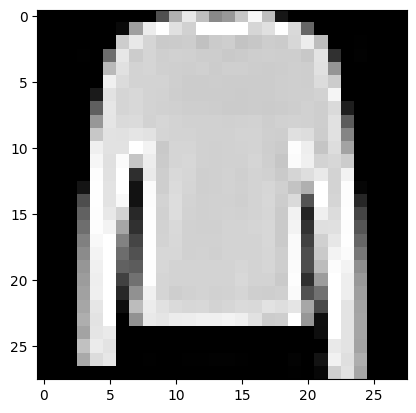

In [26]:
plt.imshow(train_features[0].squeeze(), cmap='gray')